Опыт показывает, что в первую очередь необходимо разобраться с данными. Осмыслить их

Числовые
Категориальные 
понять:
- что означают категории
- могут ти они быть отранжированы
- провести анализ районов города

сделать:
- закодировать нечисловые значения
- провести нормализацию

In [78]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import csv

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_train = pd.read_csv('train.csv')

In [79]:
df_train.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

## Features coding

### Coding rules:

* more code value => more potentially price

In [80]:
#MSSubClass
mssubclass_codes = {
    20: 3, 30: 2, 40: 4, 45: 4, 50: 5, 60: 7,
    70: 6, 75: 7, 80: 8, 85: 8, 90: 9, 120: 12,
    150: 15, 160: 16, 180: 18, 190: 16 
}
 
#MSZoning
mszoning_codes = {'A': 1, 'C': 2, 'C (all)': 2, 'FV': 3, 'I': 4, 'RH': 5, 'RL': 6, 'RM': 7, 'RP': 8}
#Street
street_codes = {'Grvl': 1, 'Pave': 2}
#Alley
alley_codes = {'Grvl': 1, 'NA': 2, 'Pave': 3}
#LotShape
lotshape_codes = {'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4}
#LandContour
landcontour_codes = {'Low': 1, 'HLS': 2, 'Bnk': 3, 'Lvl': 4}
#Utilities
utilities_codes = {'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub': 4}
#LotConfig
lotconfig_codes = {'CulDSac': 1, 'Corner': 2, 'FR2': 3, 'FR3': 4, 'Inside': 5}
#LandSlope
landslope_codes = {'Sev': 1, 'Mod': 2, 'Gtl': 3}
#Neighborhood
#inaccuracy in dataset:
# not 'Names' but 'NAmes'
neighborhood_codes_old = {
    'Blmngtn': 1, 'Blueste': 2, 'BrDale': 3, 'BrkSide': 4, 'ClearCr': 5, 'CollgCr': 6,
    'Crawfor': 7, 'Edwards': 8, 'Gilbert': 9, 'IDOTRR': 10, 'MeadowV': 11, 'Mitchel': 12,
    'NAmes': 13, 'NoRidge': 14, 'NPkVill': 15, 'NridgHt': 16, 'NWAmes': 17, 'OldTown': 18,
    'SWISU': 19, 'Sawyer': 20, 'SawyerW': 21, 'Somerst': 22, 'StoneBr': 23, 'Timber': 24, 'Veenker': 25
}

neighborhood_codes = {
    #1
    'Blmngtn': 16,
    'Blueste': 8,
    'BrDale': 3,
    'BrkSide': 6,
    'ClearCr': 18,
    'CollgCr': 17,
    'Crawfor': 19,
    'Edwards': 5, 
    'Gilbert': 14, 
    #10    
    'IDOTRR': 2, 
    'MeadowV': 1, 
    'Mitchel': 12,
    'NAmes': 10, 
    'NoRidge': 24,
    'NPkVill': 11, 
    'NridgHt': 25,
    'NWAmes': 15, 
    'OldTown': 4,
    'SWISU': 9, 
    #20
    'Sawyer': 7,  
    'SawyerW': 13, 
    'Somerst': 21, 
    'StoneBr': 23,
    'Timber': 22, 
    'Veenker': 20
}
'''
11     88000 1
10    103000 2 
3     106000 3
18    119000 4
8     121750 5

4     124300 6
20    135000 7
2     137500 8 
19    139500 9
13    140000 10

15    146000 11
12    153500 12
21    179900 13
9     181000 14
17    182900 15

1     191000 16
6     197200 17
5     200250 18
7     200624 19
25    218000 20

22    225500 21
24    228475 22
23    278000 23
14    301500 24
16    315000 25
'''

#Condition 1 and 2
condition_codes = {
    'Artery': 1, 'Feedr': 2, 'Norm': 3, 'RRNn': 4, 'RRAn': 5,
    'PosN': 6, 'PosA': 7, 'RRNe': 8, 'RRAe': 9
}

#BldgType
#inaccuracy in dataset:
# not 'TwnhsI' but 'Twnhs'
# not '2FmCon' but '2fmCon'
# not 'Duplx' but 'Duplex'
bldgtype_codes = {'TwnhsE': 1, 'Twnhs': 2, '1Fam': 3, '2fmCon': 4, 'Duplex': 5}

#HouseStyle
housestyle_codes = {'1Story': 1, '1.5Unf': 2, '1.5Fin': 3, '2Story': 4, '2.5Unf': 5, '2.5Fin': 6, 'SFoyer': 7, 'SLvl': 8}

#RoofStyle
roofstyle_codes = {'Flat': 1, 'Gable': 2, 'Gambrel': 3, 'Hip': 4, 'Mansard': 5, 'Shed': 6}

#RoofMatl
roofmatl_codes = {'Membran': 1, 'WdShake': 2, 'WdShngl': 3, 'Roll': 4, 'Tar&Grv': 5, 'Metal': 6, 'CompShg': 7, 'ClyTile': 8}

#Exterior 1st and 2nd 
#inaccuracy in dataset:
# neither 'WdShing' not 'Wd Sdng' but 'Wd Shng'
# not 'CemntBd' but 'CmentBd'
# not 'BrkComm' but 'Brk Cmn'
exterior_codes = {
    'WdShing': 1, 'Wd Shng': 1, 'Wd Sdng': 2, 'AsbShng': 3, 'AsphShn': 4, 'CBlock': 5, 'CmentBd': 6, 'CemntBd': 6,
    'HdBoard': 7, 'Stone': 8, 'PreCast': 9, 'Other': 10, 'Plywood': 11, 'BrkComm': 12, 'Brk Cmn': 12,
    'VinylSd': 13, 'MetalSd': 14, 'Stucco': 15, 'ImStucc': 16, 'BrkFace': 17
} 

#MasVnrType
masvnrtype_codes = {'None': 1, 'Stone': 2, 'CBlock': 3, 'BrkCmn': 4, 'BrkFace': 5}

#ExterQual
#ExterCond
#HeatingQC
#KitchenQual
fivelevel_codes = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5} 

#BsmtQual
#BsmtCond
#FireplaceQu
#GarageQual
#GarageCond
sixlevel_codes = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

#Foundation
foundation_codes = {'Wood': 1, 'BrkTil': 2, 'CBlock': 3, 'Stone': 4, 'Slab': 5, 'PConc': 6} 

#BsmtExposure
bsmtexposure_codes = {'Gd': 1, 'Av': 2, 'Mn': 3, 'No': 4, 'NA': 5}

#BsmtFinType1 and BsmtFinType2
bsmtfintype_codes = {'NA': 1, 'Unf': 2, 'LwQ': 3, 'Rec': 4, 'BLQ': 5, 'ALQ': 6, 'GLQ': 7}

#Heating
heating_codes = {'Wall': 1, 'OthW': 2, 'Floor': 3, 'GasA': 4, 'Grav': 5, 'GasW': 6}

#CentralAir
yno_codes = {'N': 0, 'Y': 1}

#Electrical
electrical_codes = {'FuseP': 1, 'FuseF': 2, 'Mix': 3, 'FuseA': 4, 'SBrkr': 5}

#Functional
functional_codes = {'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8} 

# GarageType
garagetype_codes = {
    'NA': 1, 'CarPort': 2, 'Detchd': 3, 'Attchd': 4,
    'Basment': 5, 'BuiltIn': 6, '2Types': 7
}

#GarageFinish
garagefinish_codes = {'NA': 1, 'Unf': 2, 'RFn': 3, 'Fin': 4}

#PavedDrive
paveddrive_codes = {'N': 1, 'P': 2, 'Y': 3}

#PoolQC
poolqc_codes = {'NA': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5} 

#Fence
fence_codes = {'NA': 1, 'MnWw': 2, 'GdWo': 3, 'MnPrv': 4, 'GdPrv': 5} 

#MiscFeature
miscfeature_codes = {'NA': 0, 'Othr': 1, 'Shed': 1, 'Gar2': 1, 'Elev': 2, 'TenC': 2}

#SaleType
saletype_codes = {
    'WD': 1, 'CWD': 2, 'VWD': 3, 'New': 4, 'COD': 5, 'Con': 6,
    'ConLw': 7, 'ConLI': 8, 'ConLD': 9, 'Oth': 10
} 

#SaleCondition
salecondition_codes = {'Normal': 1, 'Abnorml': 2, 'AdjLand': 3, 'Alloca': 4, 'Family': 5, 'Partial': 6} 


In [81]:
# lets view common statistics
#df_train.describe(include='all')

In [82]:
#df_test.MSZoning.unique()

In [83]:

#
#fillna
#

#if no frontage, then 0
df_train.LotFrontage = df_train.LotFrontage.fillna(0).astype(np.int64, copy=False)

#if no masonry, then 0
df_train.MasVnrArea = df_train.MasVnrArea.fillna(0).astype(np.int64, copy=False)

#if garage built year is unknown, then it's like home remod year or built year
df_train.GarageYrBlt = df_train.GarageYrBlt.fillna(df_train.YearRemodAdd)
df_train.GarageYrBlt = df_train.GarageYrBlt.fillna(df_train.YearBuilt).astype(np.int64, copy=False)


#
#fill and mapping
#

df_train.MSSubClass = df_train.MSSubClass.map(mssubclass_codes)
df_train.MSSubClass = df_train.MSSubClass.astype(np.int64, copy=False)

df_train.MSZoning = df_train.MSZoning.map(mszoning_codes)
df_train.MSZoning = df_train.MSZoning.astype(np.int64, copy=False)

df_train.Street = df_train.Street.map(street_codes).astype(np.int64, copy=False)

df_train.Alley = df_train.Alley.fillna('NA')
df_train.Alley = df_train.Alley.map(alley_codes).astype(np.int64, copy=False)

df_train.LotShape = df_train.LotShape.map(lotshape_codes).astype(np.int64, copy=False)

df_train.LandContour = df_train.LandContour.map(landcontour_codes).astype(np.int64, copy=False)

df_train.Utilities = df_train.Utilities.map(utilities_codes).astype(np.int64, copy=False)

df_train.LotConfig = df_train.LotConfig.map(lotconfig_codes).astype(np.int64, copy=False)

df_train.LandSlope = df_train.LandSlope.map(landslope_codes).astype(np.int64, copy=False)

df_train.Neighborhood = df_train.Neighborhood.map(neighborhood_codes).astype(np.int64, copy=False)

df_train.Condition1 = df_train.Condition1.map(condition_codes).astype(np.int64, copy=False)

df_train.Condition2 = df_train.Condition2.map(condition_codes).astype(np.int64, copy=False)

df_train.BldgType = df_train.BldgType.map(bldgtype_codes).astype(np.int64, copy=False)

df_train.HouseStyle = df_train.HouseStyle.map(housestyle_codes).astype(np.int64, copy=False)

df_train.RoofStyle = df_train.RoofStyle.map(roofstyle_codes).astype(np.int64, copy=False)

df_train.RoofMatl = df_train.RoofMatl.map(roofmatl_codes).astype(np.int64, copy=False)

df_train.Exterior1st = df_train.Exterior1st.fillna('Other')
df_train.Exterior1st = df_train.Exterior1st.map(exterior_codes).astype(np.int64, copy=False)

df_train.Exterior2nd = df_train.Exterior2nd.fillna('Other')
df_train.Exterior2nd = df_train.Exterior2nd.map(exterior_codes).astype(np.int64, copy=False)

df_train.MasVnrType = df_train.MasVnrType.fillna('None')
df_train.MasVnrType = df_train.MasVnrType.map(masvnrtype_codes).astype(np.int64, copy=False)

df_train.ExterQual = df_train.ExterQual.map(fivelevel_codes).astype(np.int64, copy=False)

df_train.ExterCond = df_train.ExterCond.map(fivelevel_codes).astype(np.int64, copy=False)

df_train.HeatingQC = df_train.HeatingQC.map(fivelevel_codes).astype(np.int64, copy=False)

df_train.KitchenQual = df_train.KitchenQual.fillna('TA')
df_train.KitchenQual = df_train.KitchenQual.map(fivelevel_codes).astype(np.int64, copy=False)

df_train.BsmtQual = df_train.BsmtQual.fillna('TA')
df_train.BsmtQual = df_train.BsmtQual.map(sixlevel_codes).astype(np.int64, copy=False)

df_train.BsmtCond = df_train.BsmtCond.fillna('TA')
df_train.BsmtCond = df_train.BsmtCond.map(sixlevel_codes).astype(np.int64, copy=False)

df_train.FireplaceQu = df_train.FireplaceQu.fillna('TA')
df_train.FireplaceQu = df_train.FireplaceQu.map(sixlevel_codes).astype(np.int64, copy=False)

df_train.GarageQual = df_train.GarageQual.fillna('TA')
df_train.GarageQual = df_train.GarageQual.map(sixlevel_codes).astype(np.int64, copy=False)

df_train.GarageCond = df_train.GarageCond.fillna('TA')
df_train.GarageCond = df_train.GarageCond.map(sixlevel_codes).astype(np.int64, copy=False)

df_train.Foundation = df_train.Foundation.map(foundation_codes).astype(np.int64, copy=False)

df_train.BsmtExposure = df_train.BsmtExposure.fillna('NA')
df_train.BsmtExposure = df_train.BsmtExposure.map(bsmtexposure_codes).astype(np.int64, copy=False)

df_train.BsmtFinType1 = df_train.BsmtFinType1.fillna('NA')
df_train.BsmtFinType1 = df_train.BsmtFinType1.map(bsmtfintype_codes).astype(np.int64, copy=False)

df_train.BsmtFinType2 = df_train.BsmtFinType2.fillna('NA')
df_train.BsmtFinType2 = df_train.BsmtFinType2.map(bsmtfintype_codes).astype(np.int64, copy=False)

df_train.Heating = df_train.Heating.map(heating_codes).astype(np.int64, copy=False)

df_train.CentralAir = df_train.CentralAir.map(yno_codes).astype(np.int64, copy=False)

#if no electrical info, then 'Mix'
df_train.Electrical = df_train.Electrical.fillna('Mix').map(electrical_codes).astype(np.int64, copy=False)

df_train.Functional = df_train.Functional.map(functional_codes).astype(np.int64, copy=False)

df_train.GarageType = df_train.GarageType.fillna('NA')
df_train.GarageType = df_train.GarageType.map(garagetype_codes).astype(np.int64, copy=False)

df_train.GarageFinish = df_train.GarageFinish.fillna('NA')
df_train.GarageFinish = df_train.GarageFinish.map(garagefinish_codes).astype(np.int64, copy=False)

df_train.PavedDrive = df_train.PavedDrive.map(paveddrive_codes).astype(np.int64, copy=False)

df_train.PoolQC = df_train.PoolQC.fillna('NA')
df_train.PoolQC = df_train.PoolQC.map(poolqc_codes).astype(np.int64, copy=False)

df_train.Fence = df_train.Fence.fillna('NA')
df_train.Fence = df_train.Fence.map(fence_codes).astype(np.int64, copy=False)

df_train.MiscFeature = df_train.MiscFeature.fillna('NA')
df_train.MiscFeature = df_train.MiscFeature.map(miscfeature_codes).astype(np.int64, copy=False)

df_train.SaleType = df_train.SaleType.map(saletype_codes).astype(np.int64, copy=False)

df_train.SaleCondition = df_train.SaleCondition.map(salecondition_codes).astype(np.int64, copy=False)

In [84]:
df_test = pd.read_csv('test.csv')


In [85]:
df_test.Neighborhood.value_counts()

NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
NPkVill     14
BrDale      14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtype: int64

In [86]:
#
#fillna
#

#if no frontage, then 0
df_test.LotFrontage = df_test.LotFrontage.fillna(0).astype(np.int64, copy=False)

#if no masonry, then 0
df_test.MasVnrArea = df_test.MasVnrArea.fillna(0).astype(np.int64, copy=False)

#if garage built year is unknown, then it's like home remod year or built year
df_test.GarageYrBlt = df_test.GarageYrBlt.fillna(df_test.YearRemodAdd)
df_test.GarageYrBlt = df_test.GarageYrBlt.fillna(df_test.YearBuilt).astype(np.int64, copy=False)


#
#fill and mapping
#

# !!! must be filled more carefully
df_test.MSSubClass = df_test.MSSubClass.fillna(75)
df_test.MSSubClass = df_test.MSSubClass.map(mssubclass_codes).astype(np.int64, copy=False)

# !!! must be filled more carefully
df_test.MSZoning = df_test.MSZoning.fillna('RH')
df_test.MSZoning = df_test.MSZoning.map(mszoning_codes).astype(np.int64, copy=False)

df_test.Street = df_test.Street.map(street_codes).astype(np.int64, copy=False)

df_test.Alley = df_test.Alley.fillna('NA')
df_test.Alley = df_test.Alley.map(alley_codes).astype(np.int64, copy=False)

df_test.LotShape = df_test.LotShape.map(lotshape_codes).astype(np.int64, copy=False)

df_test.LandContour = df_test.LandContour.map(landcontour_codes).astype(np.int64, copy=False)

# !!! must be filled more carefully
df_test.Utilities = df_test.Utilities.fillna('AllPub')
df_test.Utilities = df_test.Utilities.map(utilities_codes).astype(np.int64, copy=False)

df_test.LotConfig = df_test.LotConfig.map(lotconfig_codes).astype(np.int64, copy=False)

df_test.LandSlope = df_test.LandSlope.map(landslope_codes).astype(np.int64, copy=False)

df_test.Neighborhood = df_test.Neighborhood.map(neighborhood_codes).astype(np.int64, copy=False)

df_test.Condition1 = df_test.Condition1.map(condition_codes).astype(np.int64, copy=False)

df_test.Condition2 = df_test.Condition2.map(condition_codes).astype(np.int64, copy=False)

df_test.BldgType = df_test.BldgType.map(bldgtype_codes).astype(np.int64, copy=False)

df_test.HouseStyle = df_test.HouseStyle.map(housestyle_codes).astype(np.int64, copy=False)

df_test.RoofStyle = df_test.RoofStyle.map(roofstyle_codes).astype(np.int64, copy=False)

df_test.RoofMatl = df_test.RoofMatl.map(roofmatl_codes).astype(np.int64, copy=False)

df_test.Exterior1st = df_test.Exterior1st.fillna('Other')
df_test.Exterior1st = df_test.Exterior1st.map(exterior_codes).astype(np.int64, copy=False)

df_test.Exterior2nd = df_test.Exterior2nd.fillna('Other')
df_test.Exterior2nd = df_test.Exterior2nd.map(exterior_codes).astype(np.int64, copy=False)

df_test.MasVnrType = df_test.MasVnrType.fillna('None')
df_test.MasVnrType = df_test.MasVnrType.map(masvnrtype_codes).astype(np.int64, copy=False)

df_test.ExterQual = df_test.ExterQual.map(fivelevel_codes).astype(np.int64, copy=False)

df_test.ExterCond = df_test.ExterCond.map(fivelevel_codes).astype(np.int64, copy=False)

df_test.HeatingQC = df_test.HeatingQC.map(fivelevel_codes).astype(np.int64, copy=False)

df_test.KitchenQual = df_test.KitchenQual.fillna('TA')
df_test.KitchenQual = df_test.KitchenQual.map(fivelevel_codes).astype(np.int64, copy=False)

df_test.BsmtQual = df_test.BsmtQual.fillna('TA')
df_test.BsmtQual = df_test.BsmtQual.map(sixlevel_codes).astype(np.int64, copy=False)

df_test.BsmtCond = df_test.BsmtCond.fillna('TA')
df_test.BsmtCond = df_test.BsmtCond.map(sixlevel_codes).astype(np.int64, copy=False)

df_test.FireplaceQu = df_test.FireplaceQu.fillna('TA')
df_test.FireplaceQu = df_test.FireplaceQu.map(sixlevel_codes).astype(np.int64, copy=False)

df_test.GarageQual = df_test.GarageQual.fillna('TA')
df_test.GarageQual = df_test.GarageQual.map(sixlevel_codes).astype(np.int64, copy=False)

df_test.GarageCond = df_test.GarageCond.fillna('TA')
df_test.GarageCond = df_test.GarageCond.map(sixlevel_codes).astype(np.int64, copy=False)

df_test.Foundation = df_test.Foundation.map(foundation_codes).astype(np.int64, copy=False)

df_test.BsmtExposure = df_test.BsmtExposure.fillna('NA')
df_test.BsmtExposure = df_test.BsmtExposure.map(bsmtexposure_codes).astype(np.int64, copy=False)

df_test.BsmtFinType1 = df_test.BsmtFinType1.fillna('NA')
df_test.BsmtFinType1 = df_test.BsmtFinType1.map(bsmtfintype_codes).astype(np.int64, copy=False)

df_test.BsmtFinType2 = df_test.BsmtFinType2.fillna('NA')
df_test.BsmtFinType2 = df_test.BsmtFinType2.map(bsmtfintype_codes).astype(np.int64, copy=False)

df_test.Heating = df_test.Heating.map(heating_codes).astype(np.int64, copy=False)

df_test.CentralAir = df_test.CentralAir.map(yno_codes).astype(np.int64, copy=False)

#if no electrical info, then 'Mix'
df_test.Electrical = df_test.Electrical.fillna('Mix').map(electrical_codes).astype(np.int64, copy=False)

df_test.Functional = df_test.Functional.fillna('Typ').map(functional_codes).astype(np.int64, copy=False)

df_test.GarageType = df_test.GarageType.fillna('NA')
df_test.GarageType = df_test.GarageType.map(garagetype_codes).astype(np.int64, copy=False)

df_test.GarageFinish = df_test.GarageFinish.fillna('NA')
df_test.GarageFinish = df_test.GarageFinish.map(garagefinish_codes).astype(np.int64, copy=False)

df_test.PavedDrive = df_test.PavedDrive.map(paveddrive_codes).astype(np.int64, copy=False)

df_test.PoolQC = df_test.PoolQC.fillna('NA')
df_test.PoolQC = df_test.PoolQC.map(poolqc_codes).astype(np.int64, copy=False)

df_test.Fence = df_test.Fence.fillna('NA')
df_test.Fence = df_test.Fence.map(fence_codes).astype(np.int64, copy=False)

df_test.MiscFeature = df_test.MiscFeature.fillna('NA')
df_test.MiscFeature = df_test.MiscFeature.map(miscfeature_codes).astype(np.int64, copy=False)

df_test.SaleType = df_test.SaleType.fillna('WD').map(saletype_codes).astype(np.int64, copy=False)

df_test.SaleCondition = df_test.SaleCondition.map(salecondition_codes).astype(np.int64, copy=False)

In [87]:
#  df_test.GarageYrBlt contains some wrong values
df_test.GarageYrBlt = df_test.GarageYrBlt.apply(lambda v: v if v <= 2010 else 2010)

y_min = min([
    df_train.YearBuilt.min(), df_test.YearBuilt.min(),
    df_train.YearRemodAdd.min(), df_test.YearRemodAdd.min(),
    df_train.GarageYrBlt.min(), df_test.GarageYrBlt.min()
])

y_max = max([
    df_train.YearBuilt.max(), df_test.YearBuilt.max(),
    df_train.YearRemodAdd.max(), df_test.YearRemodAdd.max(),
    df_train.GarageYrBlt.max(), df_test.GarageYrBlt.max()
])

print(f'y_max = {y_max}, y_min = {y_min}')

y_max = 2010, y_min = 1872


In [88]:
from sklearn.preprocessing import MinMaxScaler

def normalize_year_column(year_scaler, s):
    values = s.values
    values = values.reshape((len(values), 1))
    return year_scaler.transform(values)


year_scaler = MinMaxScaler(feature_range=(0, 1))

year_series = pd.concat([
    df_train.YearBuilt, df_test.YearBuilt, 
    df_train.YearRemodAdd, df_test.YearRemodAdd,
    df_train.GarageYrBlt, df_test.GarageYrBlt]
)

#fit
values = year_series.values
values = values.reshape((len(values), 1))
year_scaler.fit(values)

#normalize year
df_train.YearBuilt = normalize_year_column(year_scaler, df_train.YearBuilt)
df_train.YearRemodAdd = normalize_year_column(year_scaler, df_train.YearRemodAdd)
df_train.GarageYrBlt = normalize_year_column(year_scaler, df_train.GarageYrBlt)

df_test.YearBuilt = normalize_year_column(year_scaler, df_test.YearBuilt)
df_test.YearRemodAdd = normalize_year_column(year_scaler, df_test.YearRemodAdd)
df_test.GarageYrBlt = normalize_year_column(year_scaler, df_test.GarageYrBlt)


In [89]:
df_train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,6.095205,5.977397,57.623288,10516.828082,1.995890,1.993836,3.591781,3.814384,3.998630,4.134932,2.937671,12.838356,3.030822,3.006849,2.906849,2.656164,6.099315,5.575342,0.719332,0.817868,2.410274,6.945205,10.048630,9.956849,2.337671,103.117123,3.39589,3.083562,4.262329,3.565068,3.010959,3.369863,4.545890,443.639726,2.247260,46.549315,567.240411,1057.429452,4.017808,4.145205,0.934932,4.869178,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,3.511644,6.517808,7.841781,0.613014,3.243151,3.702055,0.770444,2.715753,1.767123,472.980137,2.976712,2.975342,2.856164,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,1.013014,1.565753,0.037671,43.489041,6.321918,2007.815753,1.490411,1.582192,180921.195890
std,421.610009,3.801966,0.818838,34.664304,9981.264932,0.063996,0.249667,0.582296,0.606509,0.052342,1.426859,0.276232,6.686757,0.878349,0.248272,0.705084,1.945698,1.382997,1.112799,0.218862,0.149604,0.834998,0.459174,4.586504,4.534861,1.808238,180.731373,0.57428,0.351054,1.604596,0.678071,0.284178,1.067391,2.107776,456.098091,0.892332,161.319273,441.866955,438.705324,0.290985,0.959501,0.246731,0.502231,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.663760,1.625393,0.667698,0.644666,0.586974,0.996015,0.177831,0.892831,0.747315,213.804841,0.241665,0.232860,0.496592,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,0.204059,1.204483,0.194030,496.123024,2.703626,1.328095,1.368616,1.475209,79442.502883
min,1.000000,2.000000,2.000000,0.000000,1300.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.565217,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.00000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,1.000000,1.000000,0.202899,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,

In [90]:
df_test.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.0,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1458.000000,1459.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.000000,1459.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,6.126799,5.962988,57.910212,9819.161069,1.995888,1.977382,3.607951,3.817683,4.0,4.206306,2.954764,12.551062,3.076080,3.003427,2.908156,2.627827,6.078821,5.553804,0.719984,0.809151,2.382454,6.967101,9.938999,9.976011,2.293352,99.673749,3.397533,3.087731,4.281014,3.556546,2.994517,3.382454,4.537354,439.203704,2.300206,52.619342,554.294925,1046.117970,4.009596,4.158328,0.930775,4.874572,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,3.509938,6.385195,7.854695,0.58122,3.211789,3.747772,0.763591,2.716244,1.766118,472.768861,2.952022,2.969157,2.805346,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,1.007539,1.595613,0.034955,58.167923,6.104181,2007.769705,1.526388,1.579164
std,421.321334,3.832532,0.891970,32.266054,4955.517327,0.064018,0.269956,0.557864,0.586487,0.0,1.382554,0.217566,6.829239,0.991927,0.241428,0.718028,1.955070,1.436812,1.113740,0.220218,0.153119,0.806605,0.333766,4.571004,4.536558,1.798194,177.001792,0.586444,0.392637,1.621356,0.712463,0.296246,1.072985,2.120627,455.268042,1.013797,176.753926,437.260486,442.898624,0.195746,0.956684,0.253924,0.495554,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,0.660780,1.508895,0.610379,0.64742,0.596950,1.037427,0.185530,0.902110,0.775945,217.048611,0.249336,0.227728,0.574204,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,0.167523,1.230447,0.183730,630.806978,2.722432,1.301740,1.470266,1.471169
min,1461.000000,2.000000,2.000000,0.000000,1470.000000,1.000000,1.000000,1.000000,1.000000,4.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.050725,0.565217,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,2.000000,0.00000,1.000000,1.000000,0.166667,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000

In [91]:
#save datasets
df_train.to_csv('train_normalized.csv', index=False, na_rep='NA')
df_test.to_csv('test_normalized.csv', index=False, na_rep='NA')


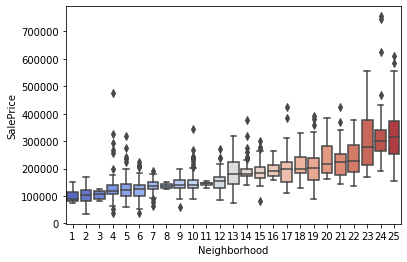

In [92]:
sns.boxplot(x='Neighborhood', y='SalePrice', data=df_train, palette='coolwarm')

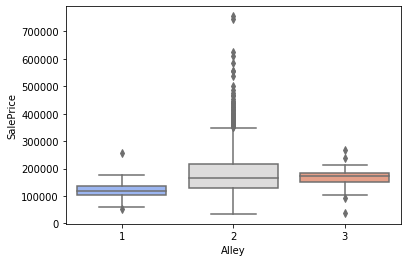

In [93]:
sns.boxplot(x='Alley', y='SalePrice', data=df_train, palette='coolwarm')

In [94]:
sp_median = df_train.groupby('Neighborhood').SalePrice.median()
sp_median.sort_values()

Neighborhood
1      88000
2     103000
3     106000
4     119000
5     121750
6     124300
7     135000
8     137500
9     139500
10    140000
11    146000
12    153500
13    179900
14    181000
15    182900
16    191000
17    197200
18    200250
19    200624
20    218000
21    225500
22    228475
23    278000
24    301500
25    315000
Name: SalePrice, dtype: int64